이 노트북의 코드에 대한 설명은 [분류기 체인: ClassifierChain](https://tensorflow.blog/2018/02/16/%EB%B6%84%EB%A5%98%EA%B8%B0-%EC%B2%B4%EC%9D%B8-classifierchain/) 글을 참고하세요.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata

fetch yeast dataset (https://www.openml.org/d/40597)

In [2]:
yeast = fetch_mldata('yeast')

In [3]:
X = yeast['data']
Y = yeast['target']

In [4]:
X.shape

(2417, 103)

In [5]:
Y

<14x2417 sparse matrix of type '<class 'numpy.float64'>'
	with 10241 stored elements in Compressed Sparse Column format>

reshape and change to ndarray

In [6]:
Y = Y.transpose().toarray()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

for OVR model

In [9]:
ovr = OneVsRestClassifier(LogisticRegression())
ovr.fit(X_train, Y_train)
pred_ovr = ovr.predict(X_test)

In [10]:
from sklearn.metrics import jaccard_similarity_score
ovr_score = jaccard_similarity_score(Y_test, pred_ovr)
ovr_score

0.50828086055358779

for CC model (https://www.cs.waikato.ac.nz/ml/publications/2009/chains.pdf)

In [11]:
from sklearn.multioutput import ClassifierChain

In [12]:
cc = ClassifierChain(LogisticRegression(), order='random', random_state=42)
cc.fit(X_train, Y_train)
pred_cc = cc.predict(X_test)
cc_score = jaccard_similarity_score(Y_test, pred_cc)
cc_score

0.52203774760592925

for CC ensemble

In [13]:
chains = [ClassifierChain(LogisticRegression(), order='random', random_state=42+i)
          for i in range(10)]
for chain in chains:
    chain.fit(X_train, Y_train)

In [14]:
pred_chains = np.array([chain.predict(X_test) for chain in chains])
chain_scores = [jaccard_similarity_score(Y_test, pred_chain)
                        for pred_chain in pred_chains]
chain_scores

[0.52203774760592925,
 0.50759953430407978,
 0.54071149809786168,
 0.51879427390791022,
 0.51900088547815826,
 0.51148445792040831,
 0.52014626787354057,
 0.50362964056145876,
 0.50333366128820667,
 0.47443673750491933]

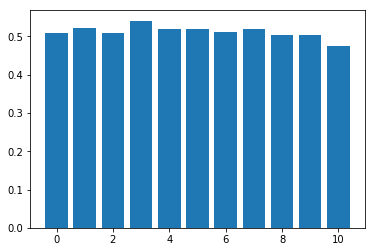

In [15]:
plt.bar(np.arange(11), [ovr_score]+chain_scores)
plt.show()

In [16]:
proba_chains = np.array([chain.predict_proba(X_test) for chain in chains])
proba_ensemble = proba_chains.mean(axis=0)
ensemble_score = jaccard_similarity_score(Y_test, proba_ensemble >= 0.5)
ensemble_score

0.51958792470156101

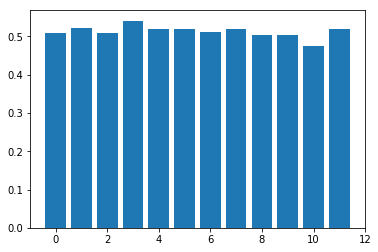

In [17]:
plt.bar(np.arange(12), [ovr_score]+chain_scores+[ensemble_score])
plt.show()